<a href="https://colab.research.google.com/github/felixzhao/AIML425-ASSN-3/blob/main/notebooks/AIML425_Assignment_3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import random
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Initialize the grid
n = 32  # 32x32 grid to represent a 3.2 km x 3.2 km area (total: 1024 sensors)
grid = torch.zeros(n, n)

# Randomly select an edge for the tiger to enter
edge = random.choice(["top", "bottom", "left", "right"])

if edge == "top":
    x, y = 0, random.randint(0, n-1)
elif edge == "bottom":
    x, y = n-1, random.randint(0, n-1)
elif edge == "left":
    x, y = random.randint(0, n-1), 0
else:  # edge == "right"
    x, y = random.randint(0, n-1), n-1

# Track of the tiger
track = [(x, y)]

# Update the sensor grid to mark the tiger's current position
grid[x, y] = 1

# Simulate the tiger's movement
while True:
    dx, dy = random.choice([(-1, -1), (-1, 0), (-1, 1),
                            (0, -1),           (0, 1),
                            (1, -1),  (1, 0),  (1, 1)])
    x, y = x + dx, y + dy

    # Check for exit conditions
    if x < 0 or x >= n or y < 0 or y >= n:
        break  # Tiger has left the grid

    # If within grid, update the track and grid
    track.append((x, y))
    grid[x, y] = 1

In [19]:
track

[(0, 9),
 (1, 9),
 (2, 9),
 (3, 8),
 (4, 7),
 (5, 8),
 (5, 7),
 (4, 8),
 (4, 7),
 (5, 6),
 (4, 5),
 (4, 4),
 (5, 4),
 (6, 3),
 (7, 3),
 (6, 3),
 (5, 2),
 (6, 1),
 (5, 0),
 (4, 1),
 (3, 0)]

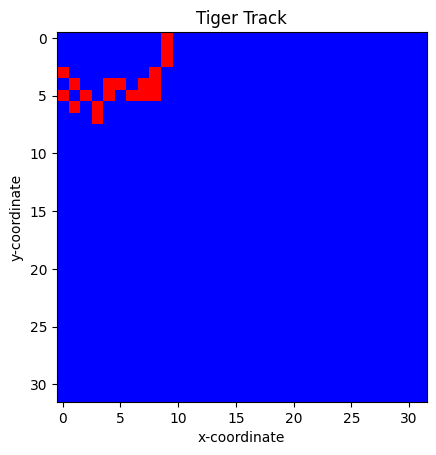

In [20]:
# Prepare the data for plotting
grid_for_plot = np.zeros((n, n, 3))
for i in range(n):
    for j in range(n):
        if grid[i, j] == 1:
            grid_for_plot[i, j] = [1, 0, 0]  # Red for tiger's track
        else:
            grid_for_plot[i, j] = [0, 0, 1]  # Blue for rest of the grid

# Plotting the entire grid
plt.imshow(grid_for_plot, origin='upper')
plt.title('Tiger Track')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()